#Courbe de coefficient d'atténuation massique du plomb

In [1]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline, interp1d

In [2]:
#Importation des données
data1 = pd.read_excel('total_attenuation.xlsx')
data2 = pd.read_excel('pe_attenuation.xlsx')
data3 = pd.read_excel('rayleigh_attenuation.xlsx')
data4 = pd.read_excel('compton_attenuation.xlsx')
data5 = pd.read_excel('materialisation_attenuation.xlsx')

print(data1.head())
print(data2.head())
print(data3.head())
print(data4.head())
print(data5.head())

    x_total    att_total
0  0.987583  5350.121075
1  1.131603  4012.052307
2  1.318879  3008.388011
3  1.590361  2049.553438
4  1.885370  1464.891895
       x_pe       att_pe
0  1.004531  5099.677090
1  1.151024  3824.244526
2  1.411774  2605.165614
3  1.702379  1861.855421
4  1.950639  1330.956037
   x_rayleigh  att_rayleigh
0    1.004531     12.263235
1    1.190870     12.253154
2    1.511213     11.667094
3    1.950639     11.108151
4    2.475358     10.576855
   x_compton  att_compton
0   0.987583     0.003590
1   1.190870     0.004780
2   1.387954     0.006366
3   1.702379     0.008079
4   2.160317     0.010754
         x_mat   att_mat
0  1233.160014  0.000366
1  1320.017769  0.000590
2  1412.993360  0.001048
3  1512.517697  0.001860
4  1733.090142  0.003000


In [16]:
#Variables
Energy1 = data1['x_total']
Attenuation_tot = data1['att_total']
Energy2 = data2['x_pe']
Attenuation_pe = data2['att_pe']
Energy3 = data3['x_rayleigh']
Attenuation_rayleigh = data3['att_rayleigh']
Energy4 = data4['x_compton']
Attenuation_compton = data4['att_compton']
Energy5 = data5['x_mat']
Attenuation_materialisation = data5['att_mat']

#Interpolation
interp1 = interp1d(Energy1, Attenuation_tot, kind='linear')
Energy_interp1 = np.linspace(min(Energy1), max(Energy1), 200)
Attenuation_tot_interp = interp1(Energy_interp1)

interp2 = interp1d(Energy2, Attenuation_pe, kind='linear')
Energy_interp2 = np.linspace(min(Energy2), max(Energy2), 200)
Attenuation_pe_interp = interp2(Energy_interp2)

interp3 = interp1d(Energy3, Attenuation_rayleigh, kind='cubic')
Energy_interp3 = np.linspace(min(Energy3), max(Energy3), 200)
Attenuation_rayleigh_interp = interp3(Energy_interp3)

interp4 = interp1d(Energy4, Attenuation_compton, kind='cubic')
Energy_interp4 = np.linspace(min(Energy4), max(Energy4), 200)
Attenuation_compton_interp = interp4(Energy_interp4)

interp5 = interp1d(Energy5, Attenuation_materialisation, kind='cubic')
Energy_interp5 = np.linspace(min(Energy5), max(Energy5), 200)
Attenuation_materialisation_interp = interp5(Energy_interp5)

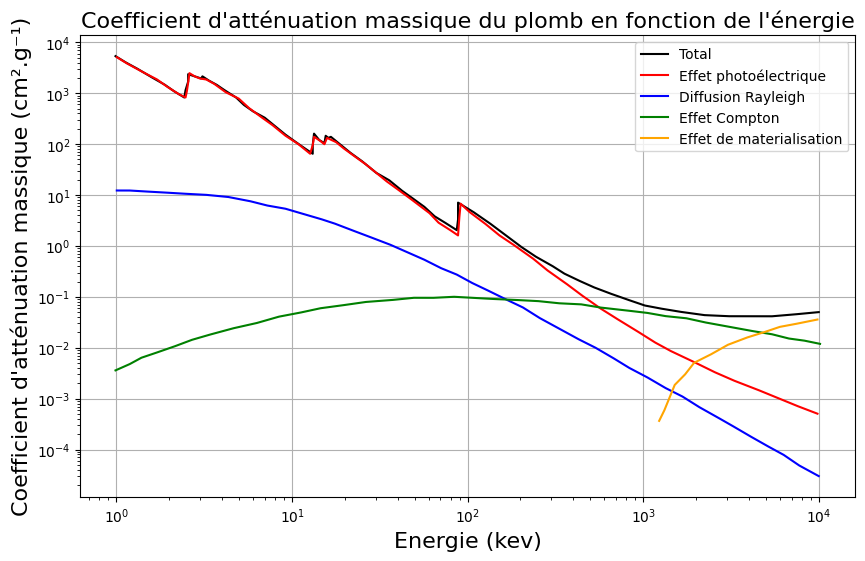

In [20]:
#Graphe
plt.figure(figsize=(10,6))
plt.plot(Energy1, Attenuation_tot, color='black', label='Total')
plt.plot(Energy2, Attenuation_pe, color='red', label='Effet photoélectrique')
plt.plot(Energy3, Attenuation_rayleigh, color='blue', label='Diffusion Rayleigh')
plt.plot(Energy4, Attenuation_compton, color='green', label='Effet Compton')
plt.plot(Energy5, Attenuation_materialisation, color='orange', label='Effet de materialisation')
plt.xlabel('Energie (kev)', fontsize=16)
plt.ylabel("Coefficient d'atténuation massique (cm².g\u207B\u00B9)", fontsize=16)
plt.title("Coefficient d'atténuation massique du plomb en fonction de l'énergie", fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()